## Imersão de Dados - Alura

### Apresentação

#### Autores
1.   [Grupo Alura](https://www.alura.com.br) - A maior plataforma brasileira de cursos de tecnologia.
2.   [Lucas Araújo](https://www.linkedin.com/in/lucasaraujo0255/) - Entusiasta de Data Science e cursando Ciências da Computação

### Resumo

Este documento tem o objetivo apresentar um estudo de Data Science oferecido na semana de Imersão de Dados da Alura (https://www.alura.com.br): uma análise exploratória sobre o Exame Nacional do Ensino Médio - o ENEM - na sua edição do ano de 2019 e criação de um modelo de Machine Learning utilizando o Python e as principais bibliotecas na área de Data Science.

### Ferramentas Utilizadas
A análise foi efetuada utilizando-se a linguagem de programação **Python** e suas bibliotecas para análise e processamento de dados **Pandas** e **NumPy**, bem como as bibliotecas **Matplotlib** e **Seaborn** para visualização de dados, além de API´s e outras bibliotecas que serão apresentadas no decorrer do documento.

Os dados foram disponibilizados pela Alura e contém cerca de 128 mil registros de inscrições de alunos que realizaram as provas do ENEM 2019.

Clique [Aqui](https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true.) para acessar os dados

#### Desafios - Dia 03:

**1**: Plotar as médias, medianas e moda nas notas de LC e MT

**2**: Melhorar a visualização da matriz de correlação e analisar mais detalhadamente.

**3**: Filtrar as notas por seu estado ou sua cidade e refazer as análises verificando se são semelhantes ao geral.

**4**: Pensar sobre a correlação entre matemática e Linguagens.

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
df = pd.read_csv('https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true')
df.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,...,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,...,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,...,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,...,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,...,A,A,A,B,A,A,D,A,A,B


In [3]:
provas = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_REDACAO"]

In [4]:
df["NU_NOTA_TOTAL"] = df[provas].sum(axis = 1)

In [5]:
df_sem_zero = df.query("NU_NOTA_TOTAL != 0")

## [Aula 03](https://www.alura.com.br/imersao-dados/aula03-distribuicoes-ciencia-de-dados) - Distribuições e Correlações

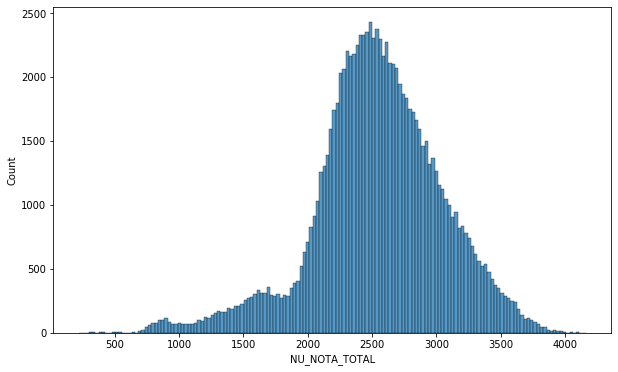

In [6]:
# Gráfico da nota total
plt.figure(figsize=(10, 6))
sns.histplot(df_sem_zero, x = "NU_NOTA_TOTAL")

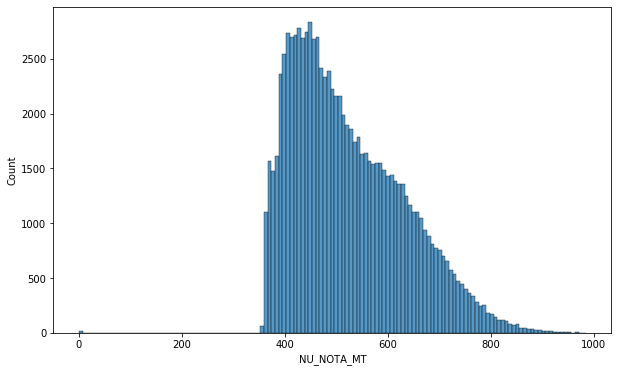

In [7]:
# Gráfico com a nota de matemática
plt.figure(figsize=(10, 6))
sns.histplot(df_sem_zero, x = "NU_NOTA_MT")

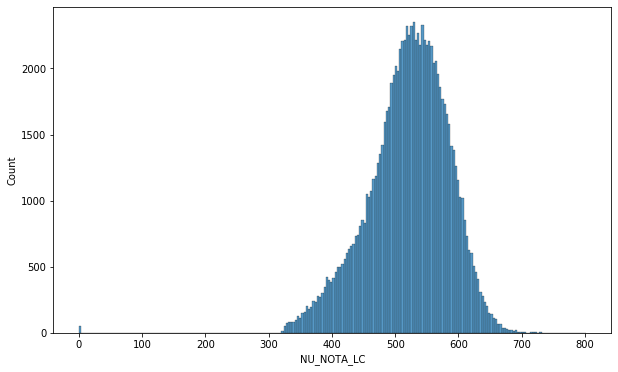

In [8]:
plt.figure(figsize= (10, 6))
sns.histplot(df_sem_zero, x = "NU_NOTA_LC")

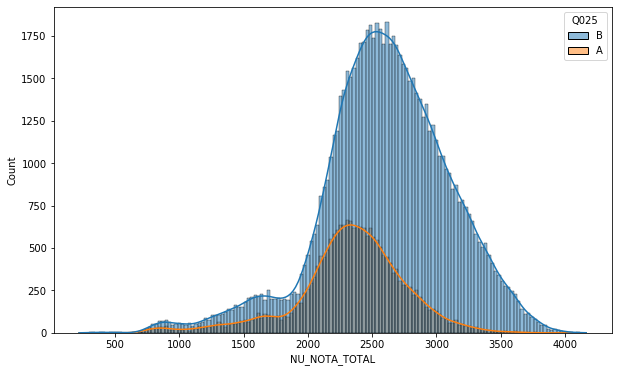

In [9]:
plt.figure(figsize= (10, 6))
sns.histplot(df_sem_zero, x = "NU_NOTA_TOTAL", hue = "Q025", kde= True)

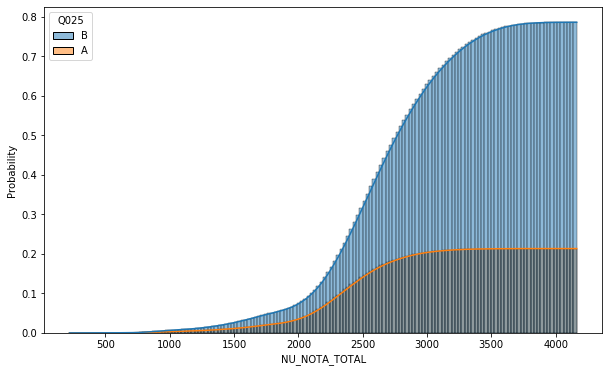

In [10]:
plt.figure(figsize= (10, 6))
sns.histplot(df_sem_zero, x = "NU_NOTA_TOTAL", hue = "Q025", kde= True, stat="probability", cumulative = True)

Com isso, podemos observar que as pessoas sem internet (A) possuem notas mais baixas do que pessoas com internet (B)

(-50, 1050)

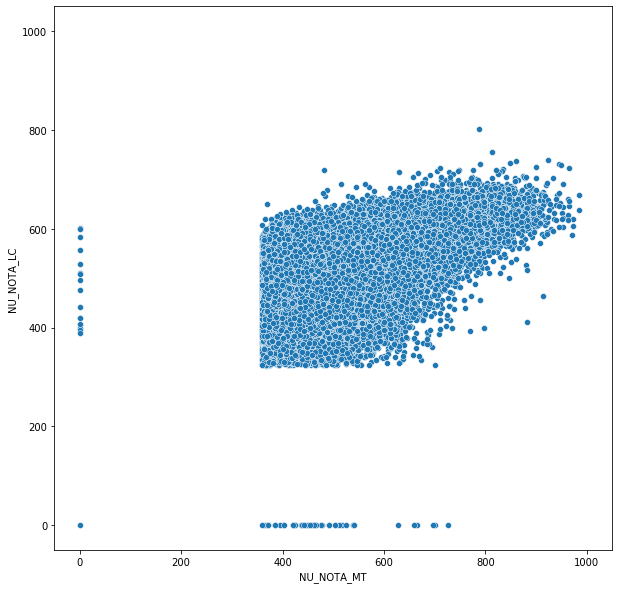

In [11]:
plt.figure(figsize = (10, 10))
sns.scatterplot(data = df_sem_zero, x = "NU_NOTA_MT", y = "NU_NOTA_LC")
plt.xlim((-50, 1050))
plt.ylim((-50, 1050))

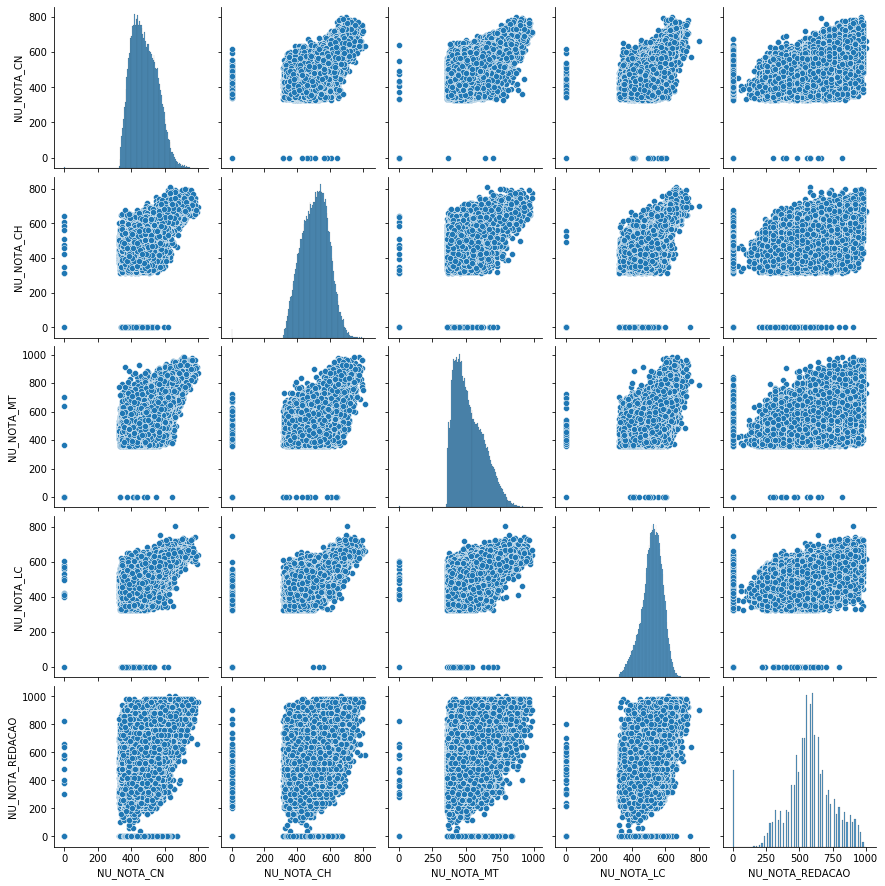

In [12]:
sns.pairplot(df_sem_zero[provas])

In [13]:
correlacao = df_sem_zero[provas].corr()
correlacao

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO
NU_NOTA_CN,1.000000,0.668979,0.649527,0.641624,0.504740
NU_NOTA_CH,0.668979,1.000000,0.610332,0.744170,0.528338
NU_NOTA_MT,0.649527,0.610332,1.000000,0.587710,0.493046
NU_NOTA_LC,0.641624,0.744170,0.587710,1.000000,0.535797
NU_NOTA_REDACAO,0.504740,0.528338,0.493046,0.535797,1.000000


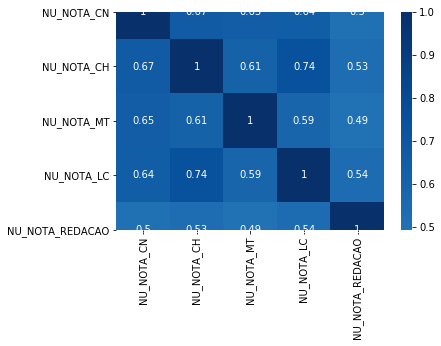

In [14]:
sns.heatmap(correlacao, cmap = "Blues", center = 0, annot = True)

###### Desafio 01 - Plotar as médias, medianas e moda nas notas de LC e MT

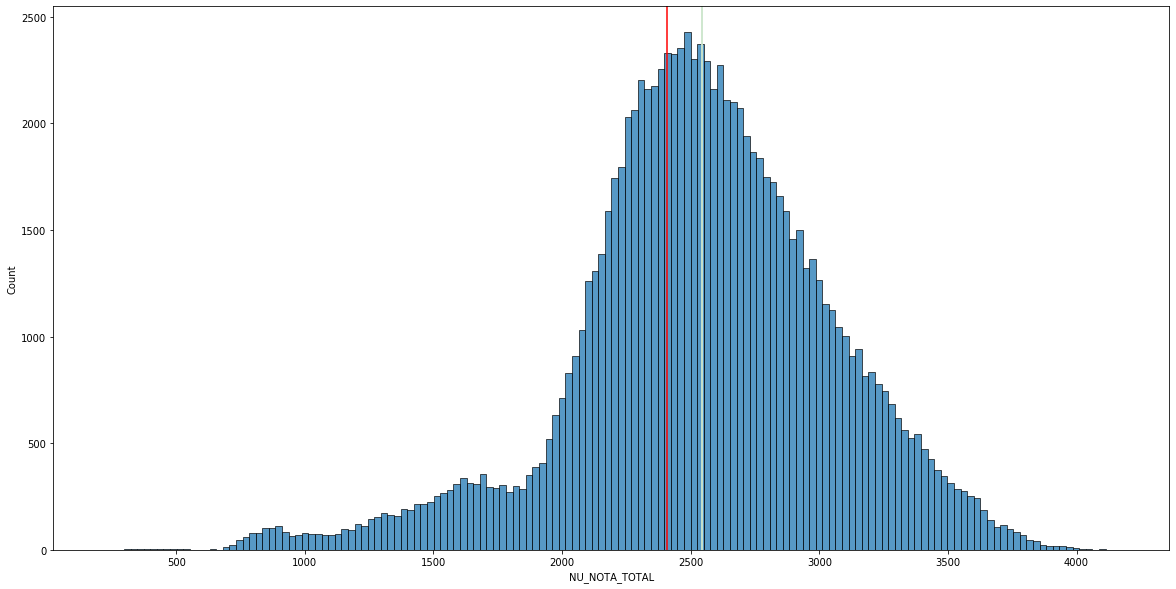

In [15]:
plt.figure(figsize=(20, 10))
sns.histplot(df_sem_zero, x = 'NU_NOTA_TOTAL')
plt.axvline(df_sem_zero['NU_NOTA_TOTAL'].mean(), color='g')
plt.axvline(df_sem_zero['NU_NOTA_TOTAL'].median(), color='w')
plt.axvline(df_sem_zero['NU_NOTA_TOTAL'].mode()[0], color='r')

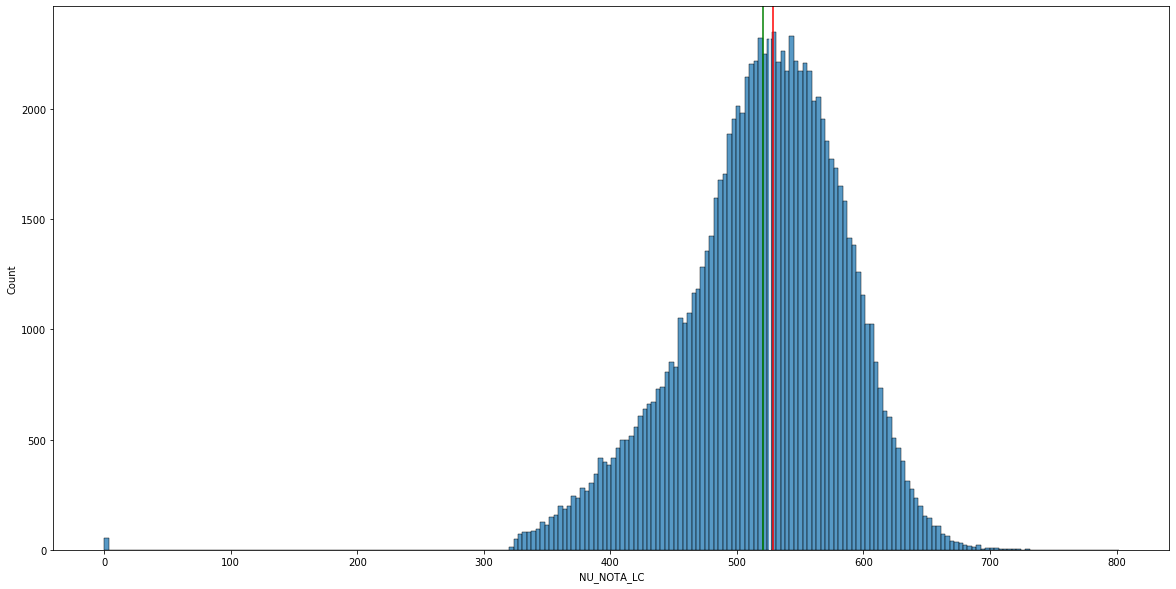

In [16]:
plt.figure(figsize=(20, 10))
sns.histplot(df_sem_zero, x = 'NU_NOTA_LC')
plt.axvline(df_sem_zero['NU_NOTA_LC'].mean(), color='g')
plt.axvline(df_sem_zero['NU_NOTA_LC'].median(), color='w')
plt.axvline(df_sem_zero['NU_NOTA_LC'].mode()[0], color='r')

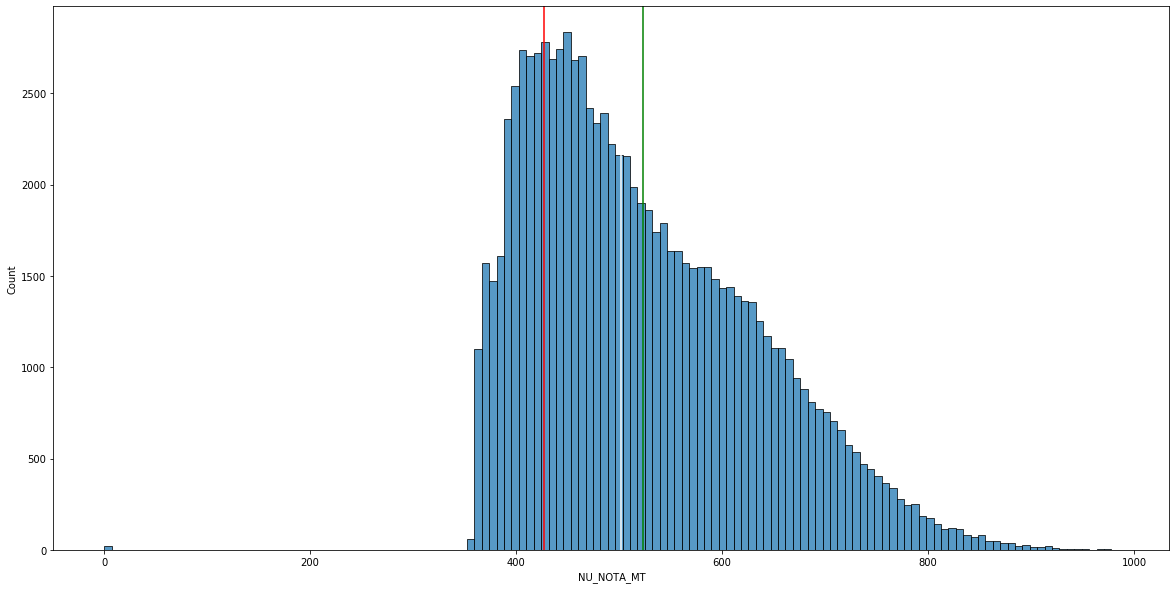

In [17]:
plt.figure(figsize=(20, 10))
sns.histplot(df_sem_zero, x = 'NU_NOTA_MT')
plt.axvline(df_sem_zero['NU_NOTA_MT'].mean(), color='g')
plt.axvline(df_sem_zero['NU_NOTA_MT'].median(), color='w')
plt.axvline(df_sem_zero['NU_NOTA_MT'].mode()[0], color='r')

###### Desafio 02 - Melhorar a visualização da matriz de correlação e analisar mais detalhadamente.

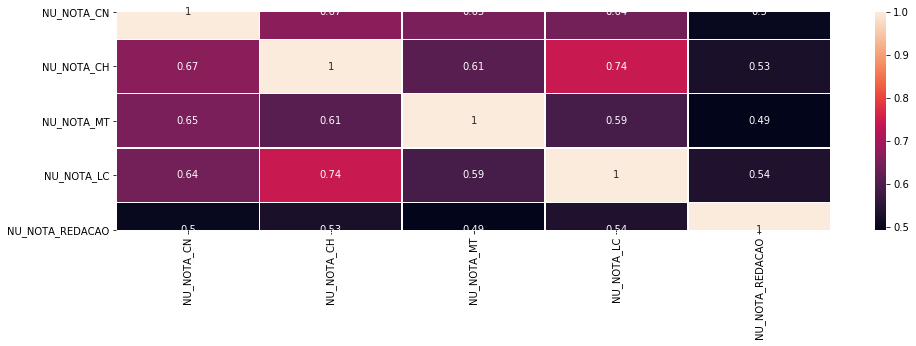

In [18]:
plt.figure(figsize=(16, 4))

sns.heatmap(correlacao, annot=True, linewidths=0.5)
plt.xticks(rotation=90)
plt.show()

Podemos observar que as correlações mais próximas de 0 (o que indica menor correlação) é entre a nota de redação e todas as outras.

Podemos observar que a maior correlação positiva (quando a nota de uma sobe a outra também sobe) é entre as provas de Ciências Humanas e Linguagens e Códigos o que faz sentido tendo em vista que são as áreas que se cruzam, em grande parte, nos problemas de análise.

###### Desafio 03 - Filtrar as notas por seu estado ou sua cidade e refazer as análises verificando se são semelhantes ao geral.

In [19]:
df_CE = df_sem_zero.query('SG_UF_RESIDENCIA == "CE"')
correlacao_CE = df_CE[provas].corr()

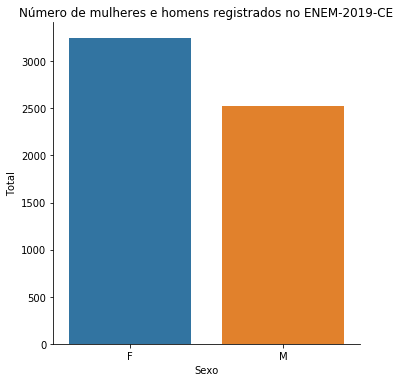

In [20]:
sns.catplot(x= 'TP_SEXO', kind= 'count', data= df_CE)
plt.title('Número de mulheres e homens registrados no ENEM-2019-CE')
plt.ylabel('Total')
plt.xlabel('Sexo')
plt.xticks([0, 1], ['F', 'M'])
plt.show()

Além de seguir a lógica a diferença para mais mulheres inscritas é maior na amostra do Ceará.

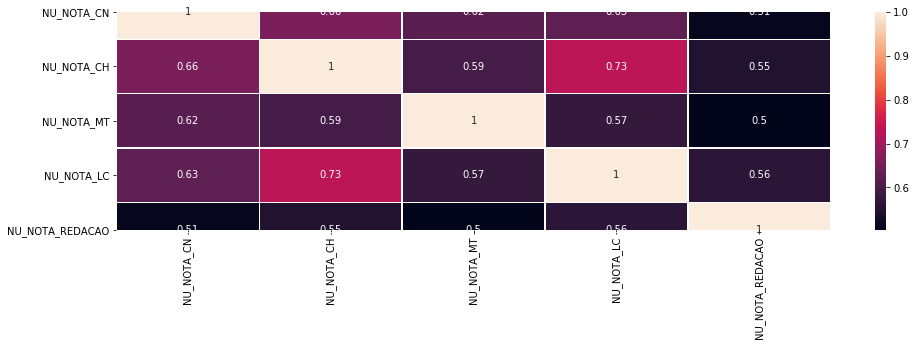

In [21]:
plt.figure(figsize=(16, 4))

sns.heatmap(correlacao_CE, annot=True, linewidths=0.5)
plt.xticks(rotation=90)
plt.show()

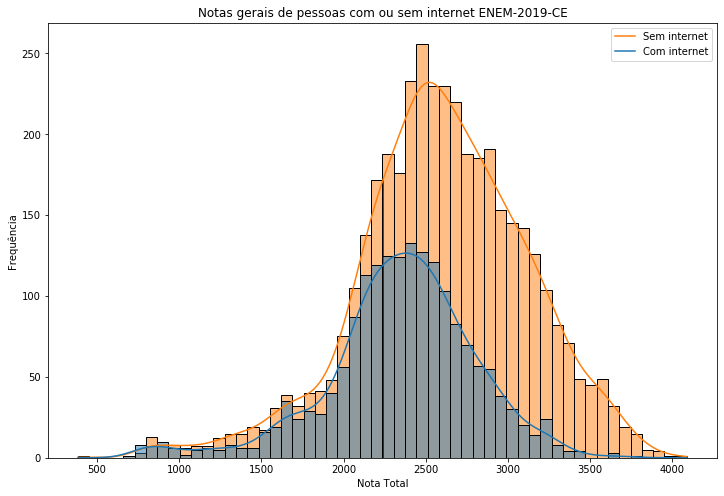

In [22]:
plt.figure(figsize=(12,8))
sns.histplot(df_CE, x = "NU_NOTA_TOTAL", hue="Q025", kde=True)

plt.title('Notas gerais de pessoas com ou sem internet ENEM-2019-CE')
plt.ylabel('Frequência')
plt.xlabel('Nota Total')
plt.legend(['Sem internet', 'Com internet'])
plt.show()

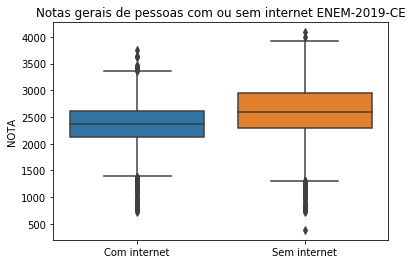

In [23]:
sns.boxplot(x= 'Q025', y= 'NU_NOTA_TOTAL', data= df_CE)
plt.title('Notas gerais de pessoas com ou sem internet ENEM-2019-CE')
plt.ylabel('NOTA')
plt.xlabel('')
plt.xticks([0, 1], ['Com internet', 'Sem internet'])
plt.show()

Pelo que podemos observar no boxplot e no histograma, é que a lógica nos dados do estado do ceará é diferente do que todos os estados.

A concentração das notas para alunos sem internet estão mais acima no boxplot, o que indica que alunos sem internet possuem notas mais altas que os alunos com internet em casa.

###### Desafio 04 - Pensar sobre a correlação entre matemática e Linguagens.

Text(0.5, 1.0, 'Correlação entre Matemática e Linguagens')

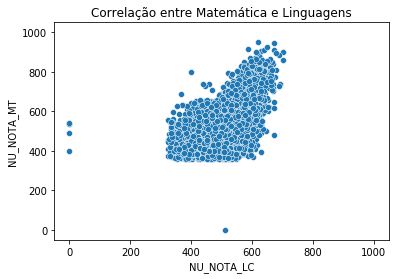

In [24]:
sns.scatterplot(data = df_CE, x="NU_NOTA_LC", y="NU_NOTA_MT")
plt.xlim((-50, 1050))
plt.ylim((-50, 1050))
plt.title("Correlação entre Matemática e Linguagens")